# Loading the dataset

In [2]:
import pickle
import pandas
dbfile = open('D:/datasets/df_train_api.pk', 'rb')
df=pickle.load(dbfile)
import pandas as pd
import numpy as np

In [3]:
df

,groups,type,data,label,coords
270,ACME VISUAL SYSTEMS,"(acm visual system, text,text,text, 2337, 1653)",14754,0,"[511.0, 143.0, 1217.0, 189.0, 864.0, 166.0]"
271,TAX INVOICE,"(tax invoic, text,text, 2337, 1653)",14754,0,"[717.0, 264.0, 877.0, 284.0, 797.0, 274.0]"
272,ACME VISUAL SYSTEMS,"(acm visual system, text,text,text, 2337, 1653)",14754,0,"[166.0, 351.0, 435.0, 369.0, 300.5, 360.0]"
273,"808, JANTA FLAT, GTB ENCLAVE, NANAD NAGARI","(number janta flat gtb enclav nanad nagari, nu...",14754,0,"[167.0, 384.0, 712.0, 403.0, 439.5, 393.5]"
274,DELHI-110093,"(delhi-110093, text, 2337, 1653)",14754,0,"[168.0, 417.0, 323.0, 436.0, 245.5, 426.5]"
275,CONTACT:-9871101347,"(contact:-9871101347, text, 2337, 1653)",14754,0,"[167.0, 451.0, 435.0, 470.0, 301.0, 460.5]"
276,EMAIL:-acmevisualsystems@mail.com,"(email, email, 2337, 1653)",14754,0,"[167.0, 486.0, 610.0, 506.0, 388.5, 496.0]"
277,Invoice No.,"(invoic number, text,text, 2337, 1653)",14754,0,"[888.0, 350.0, 1010.0, 368.0, 949.0, 359.0]"
278,GS-032,"(gs-032, text, 2337, 1653)",14754,2,"[887.0, 384.0, 965.0, 402.0, 926.0, 393.0]"
279,Delivery Note:-,"(deliveri note:-, text,text, 2337, 1653)",14754,0,"[887.0, 416.0, 1059.0, 435.0, 973.0, 425.5]"


In [4]:
df.loc[270][4][0]

511.0

# Data PreProcessing

In [5]:
#df.loc[299][4][0]
def separator(no):  #function to separate the coords data
    
    a=[]
    for i in range(270, 5776):
        try:
            n=df.loc[i][4][no]
            a.append(n)
        except:
            pass
    return (pd.DataFrame(a))

In [6]:
def separator_type(no):  #function to separate the type data
    
    l=[]
    for i in range(270, 5776):
        try:
            n=df.loc[i][1][no]
            l.append(n)
        except:
            pass
    return (pd.DataFrame(l))

In [7]:
a=separator_type(0).rename(columns={0:'type_a'}, inplace=False)
b=separator_type(1).rename(columns={0:'type_b'}, inplace=False)
c=separator_type(2).rename(columns={0:'type_c'}, inplace=False)
d=separator_type(3).rename(columns={0:'type_d'}, inplace=False)
#c

In [8]:
#separator_type(0)

In [9]:
xmin=separator(0).rename(columns={0:'xmin'}, inplace=False)
ymin=separator(1).rename(columns={0:'ymin'}, inplace=False)
xmax=separator(2).rename(columns={0:'xmax'}, inplace=False)
ymax=separator(3).rename(columns={0:'ymax'}, inplace=False)
midpointX=separator(4).rename(columns={0:'midpointX'}, inplace=False)
midpointY=separator(5).rename(columns={0:'midpointY'}, inplace=False)
#ymin

In [10]:
df=df.drop('coords', axis=1)
df=df.drop('type', axis=1)

df=df.reset_index(drop=True)
#df

In [11]:
# merging the separated coords data with the full dataset
df=pd.concat([ df, xmin, ymin, xmax, ymax, midpointX, midpointY], axis=1) 
df

,groups,data,label,xmin,ymin,xmax,ymax,midpointX,midpointY
0,ACME VISUAL SYSTEMS,14754,0,511.0,143.0,1217.0,189.0,864.0,166.0
1,TAX INVOICE,14754,0,717.0,264.0,877.0,284.0,797.0,274.0
2,ACME VISUAL SYSTEMS,14754,0,166.0,351.0,435.0,369.0,300.5,360.0
3,"808, JANTA FLAT, GTB ENCLAVE, NANAD NAGARI",14754,0,167.0,384.0,712.0,403.0,439.5,393.5
4,DELHI-110093,14754,0,168.0,417.0,323.0,436.0,245.5,426.5
5,CONTACT:-9871101347,14754,0,167.0,451.0,435.0,470.0,301.0,460.5
6,EMAIL:-acmevisualsystems@mail.com,14754,0,167.0,486.0,610.0,506.0,388.5,496.0
7,Invoice No.,14754,0,888.0,350.0,1010.0,368.0,949.0,359.0
8,GS-032,14754,2,887.0,384.0,965.0,402.0,926.0,393.0
9,Delivery Note:-,14754,0,887.0,416.0,1059.0,435.0,973.0,425.5


In [12]:
# merging the separated type data with the full dataset
df=pd.concat([ df, b, c, d], axis=1)
df

,groups,data,label,xmin,ymin,xmax,ymax,midpointX,midpointY,type_b,type_c,type_d
0,ACME VISUAL SYSTEMS,14754,0,511.0,143.0,1217.0,189.0,864.0,166.0,"text,text,text",2337.0,1653.0
1,TAX INVOICE,14754,0,717.0,264.0,877.0,284.0,797.0,274.0,"text,text",2337.0,1653.0
2,ACME VISUAL SYSTEMS,14754,0,166.0,351.0,435.0,369.0,300.5,360.0,"text,text,text",2337.0,1653.0
3,"808, JANTA FLAT, GTB ENCLAVE, NANAD NAGARI",14754,0,167.0,384.0,712.0,403.0,439.5,393.5,"number,text,text,text,text,text,text",2337.0,1653.0
4,DELHI-110093,14754,0,168.0,417.0,323.0,436.0,245.5,426.5,text,2337.0,1653.0
5,CONTACT:-9871101347,14754,0,167.0,451.0,435.0,470.0,301.0,460.5,text,2337.0,1653.0
6,EMAIL:-acmevisualsystems@mail.com,14754,0,167.0,486.0,610.0,506.0,388.5,496.0,email,2337.0,1653.0
7,Invoice No.,14754,0,888.0,350.0,1010.0,368.0,949.0,359.0,"text,text",2337.0,1653.0
8,GS-032,14754,2,887.0,384.0,965.0,402.0,926.0,393.0,text,2337.0,1653.0
9,Delivery Note:-,14754,0,887.0,416.0,1059.0,435.0,973.0,425.5,"text,text",2337.0,1653.0


In [13]:
df=pd.DataFrame(df)
y=df['label']

In [14]:
X=df.drop('label', axis=1)
X=X.drop([4753], axis=0)


# Visualization 

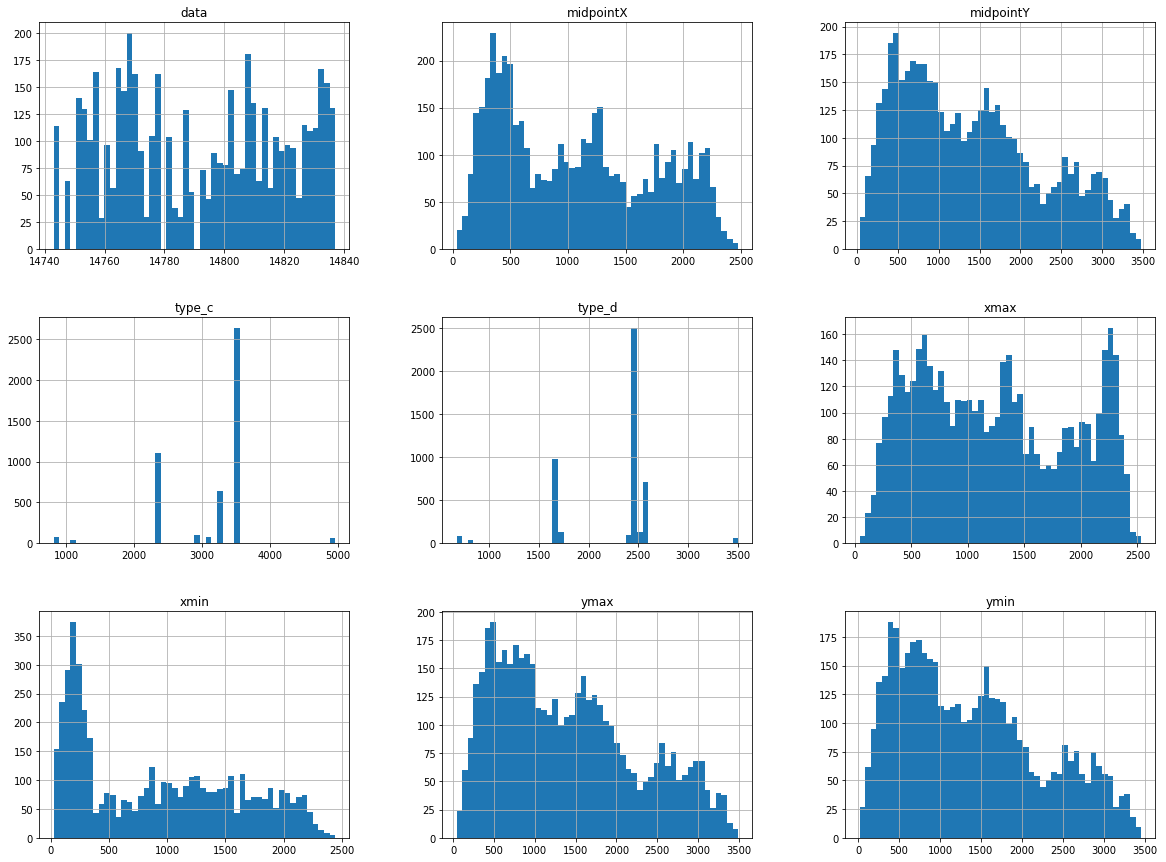

In [16]:
import matplotlib.pyplot as plt

X.hist(bins=50, figsize=(20,15))
plt.show()

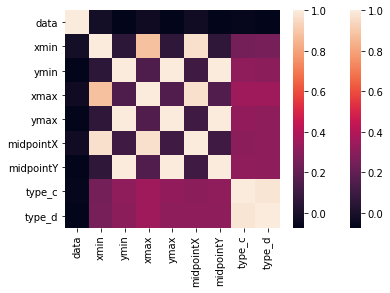

In [18]:
#visualization of correlation between features
import seaborn as sns
sns.heatmap(X.corr())
plt.show()

D:\Softwares\anacond33\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


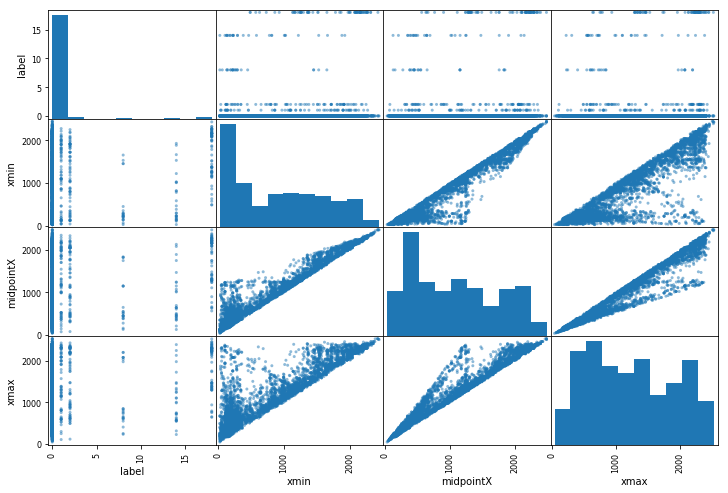

In [24]:
from pandas.tools.plotting import scatter_matrix
attributes = ['label', 'xmin', 'midpointX', 'xmax']
#"housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [23]:
#correlation score between features
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label        1.000000
xmin         0.111023
midpointX    0.110429
xmax         0.102964
data         0.000512
ymax        -0.017930
midpointY   -0.017970
ymin        -0.018009
type_d      -0.021273
type_c      -0.023519
Name: label, dtype: float64

### One_Hot_Encoding and Normalising

In [26]:
#one hot encoding of data
import category_encoders as ce
le=ce.OneHotEncoder()
X=le.fit_transform(X)

In [27]:
#normalising of all data
from sklearn.preprocessing import MinMaxScaler, normalize
X= normalize(X)
#X=scaler.fit(X)
#X=normalizer.transform(X)

In [28]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581
0,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.976151,0.033809,0.009461,0.080519,0.012505,0.057164,0.010983,0.154620,0.109365
1,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.977068,0.047483,0.017483,0.058078,0.018808,0.052780,0.018145,0.154765,0.109468
2,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.980185,0.011028,0.023319,0.028899,0.024515,0.019964,0.023917,0.155259,0.109817
3,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.979112,0.011083,0.025483,0.047250,0.026744,0.029166,0.026114,0.155089,0.109697
4,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.980093,0.011160,0.027701,0.021457,0.028963,0.016308,0.028332,0.155244,0.109807
5,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.979649,0.011089,0.029946,0.028884,0.031207,0.019986,0.030577,0.155174,0.109757
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,...,0.0,0.978905,0.011080,0.032245,0.040473,0.033572,0.025776,0.032909,0.155056,0.109674
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,...,0.0,0.975034,0.058684,0.023130,0.066747,0.024320,0.062716,0.023725,0.154443,0.109240
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,...,0.0,0.975156,0.058626,0.025380,0.063781,0.026570,0.061203,0.025975,0.154462,0.109254
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.000000,...,0.0,0.974392,0.058580,0.027474,0.069939,0.028729,0.064259,0.028101,0.154341,0.109168


In [29]:
# labelencoder to encode label data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
y=pd.DataFrame(y)
y=y.drop([4753], axis=0)

# Splitting the data into train and test dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
#X_train

# Model making

#### Decision tree

In [36]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#parameters=
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred=clf.predict(X_test)
(accuracy_score(y_test,y_pred))


0.93944491169049626

In [38]:
f1_score(y_test, y_pred, average='weighted')

0.92721582347434672

#### MLPClassifier

In [39]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(max_iter=1000)
clf_mlp.fit(X_train, y_train)

D:\Softwares\anacond33\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
y_pred=clf_mlp.predict(X_test)
accuracy_score(y_test,y_pred)

0.93860386879730862

In [41]:
f1_score(y_test, y_pred, average='weighted')

D:\Softwares\anacond33\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.90887801959027903

#### DNNClassifier

In [22]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[1024, 512, 256], n_classes=6, 
                                         feature_columns=feature_columns)

dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=10000, input_fn=None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024532DFDBA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\tunes\\AppData\\Local\\Temp\\tmpi_ucw23y'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\tunes\AppData\Local\Temp\tmpi_ucw23y\m

INFO:tensorflow:loss = 0.205946, step = 7101 (4.450 sec)
INFO:tensorflow:global_step/sec: 22.7213
INFO:tensorflow:loss = 0.232234, step = 7201 (4.394 sec)
INFO:tensorflow:global_step/sec: 22.5947
INFO:tensorflow:loss = 0.374166, step = 7301 (4.435 sec)
INFO:tensorflow:global_step/sec: 22.814
INFO:tensorflow:loss = 0.6726, step = 7401 (4.394 sec)
INFO:tensorflow:global_step/sec: 22.8809
INFO:tensorflow:loss = 0.0594741, step = 7501 (4.371 sec)
INFO:tensorflow:global_step/sec: 22.8101
INFO:tensorflow:loss = 0.410786, step = 7601 (4.377 sec)
INFO:tensorflow:global_step/sec: 22.4439
INFO:tensorflow:loss = 0.178022, step = 7701 (4.459 sec)
INFO:tensorflow:global_step/sec: 22.6864
INFO:tensorflow:loss = 0.278747, step = 7801 (4.548 sec)
INFO:tensorflow:global_step/sec: 21.1922
INFO:tensorflow:loss = 0.109995, step = 7901 (4.580 sec)
INFO:tensorflow:global_step/sec: 19.3461
INFO:tensorflow:loss = 0.0655742, step = 8001 (5.161 sec)
INFO:tensorflow:global_step/sec: 21.3062
INFO:tensorflow:loss 

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x0000024532DD6780>, 'hidden_units': [1024, 512, 256], 'feature_columns': (_RealValuedColumn(column_name='', dimension=3582, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x0000024520DD1400>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [23]:
from sklearn.metrics import accuracy_score
y_pred = list(dnn_clf.predict(X_test))
accuracy_score(y_test, y_pred)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\tunes\AppData\Local\Temp\tmpi_ucw23y\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.93860386879730862

In [ ]:
f1_score(y_test, y_pred, average='weighted')

#### SVM

In [42]:
from sklearn import svm
#parameter={''}
clf_svm=svm.SVC(decision_function_shape='ovo', kernel='sigmoid')
clf_svm.fit(X_train, y_train)


D:\Softwares\anacond33\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
from sklearn.metrics import accuracy_score
y_pred=clf_svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.93860386879730862

In [44]:
f1_score(y_test, y_pred, average='weighted')

D:\Softwares\anacond33\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.90887801959027903

#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier(n_estimators=500, max_depth=None)

clf_rf.fit(X_train, y_train)
y_pred=clf_rf.predict(X_test)

accuracy_score(y_test, y_pred)

D:\Softwares\anacond33\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.94449116904962149

In [61]:
f1_score(y_test, y_pred, average='weighted')

0.9239295660312693

In [62]:
# Dump the trained decision tree classifier with Pickle
rf_pkl_filename = 'rf_classifier.pkl'
# Open the file to save as pkl file
rf_model_pkl = open(rf_pkl_filename, 'wb')
pickle.dump(clf_rf, rf_model_pkl)
# Close the pickle instances
rf_model_pkl.close()

In [63]:
rf_model_pkl = open(rf_pkl_filename, 'rb')
rf_model = pickle.load(rf_model_pkl)
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Maximum accuracy and f1_score is from Randon Forest.